In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sn
import seaborn as sns

In [2]:
given_data = pd.read_csv ('Comcast_telecom_complaints_data.csv')

In [3]:
given_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [8]:
given_data.shape

(2224, 11)

In [9]:
given_data['Date_month_year'] = pd.to_datetime(given_data['Date_month_year'])
given_data['Created_Month'] =  given_data['Date_month_year'].apply(lambda x: x.month)
given_data['Created_Day'] = given_data['Date_month_year'].apply(lambda x: x.day)
given_data['Created_Day of Week'] = given_data['Date_month_year'].apply(lambda x: x.dayofweek)

In [10]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
given_data['Created_Day of Week']=given_data['Created_Day of Week'].map(dmap)
given_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue


Text(0.8, 0.85, 'Max complaints in Jun')

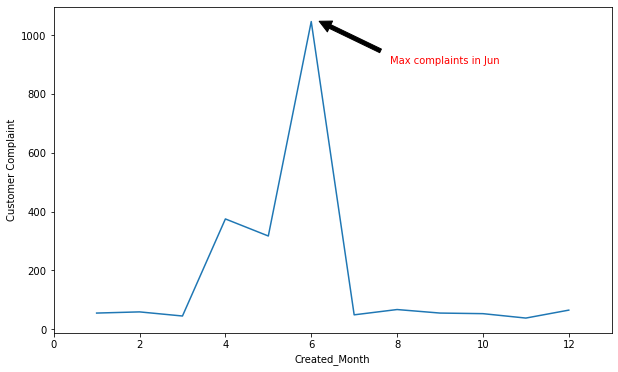

In [19]:
#number of complaints monthly
plt.figure(figsize=(10,6))
by_month = given_data.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = by_month, sort=False,markers = "o")
ax = lp.axes
ax.set_xlim(0,13)
ax.annotate('Max complaints in Jun', color='red',
            xy=(6, 1060), xycoords='data',
            xytext=(0.8, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')

(0.0, 32.0)

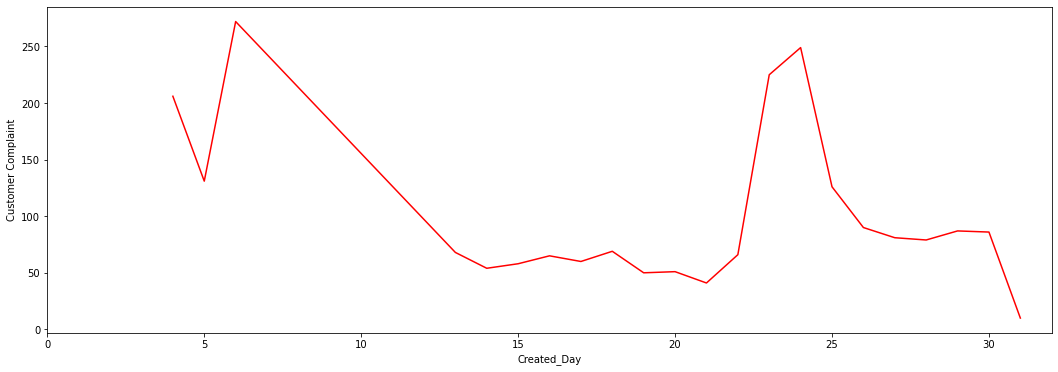

In [13]:
#number of complaints Daily
plt.figure(figsize=(18,6))
byday = given_data.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

<AxesSubplot:xlabel='Created_Day of Week', ylabel='count'>

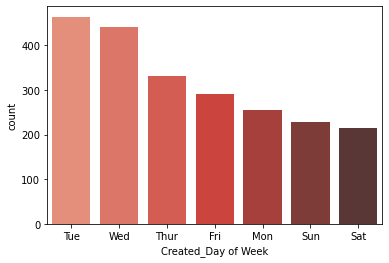

In [14]:
#number of complaints based on created day of the week
sns.countplot(x='Created_Day of Week', data = given_data, order=given_data['Created_Day of Week'].value_counts().index, palette ="Reds_d")
#More number of complaints on Tuesday and wednesday